1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
import pandas as pd

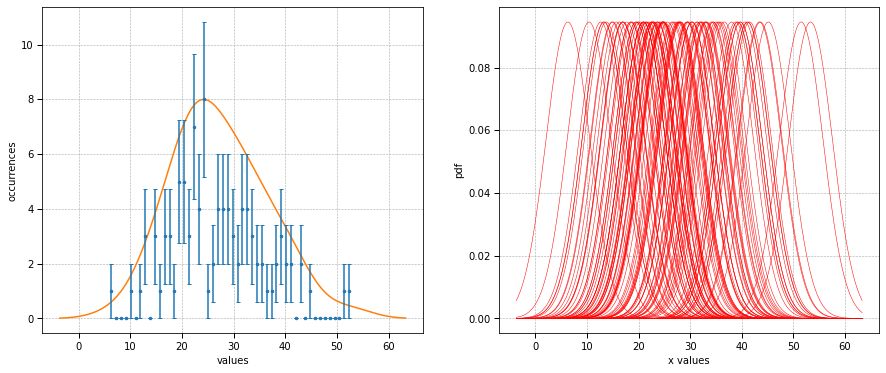

In [2]:
N=100; mean=30; std=10;
x=np.random.randn(N,1)*std+mean # random vector with normal distribution

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax1.grid(linestyle="--", linewidth=0.6, zorder=-10);
ax1.set_xlabel('values');
ax1.set_ylabel('occurrences');
ax1.tick_params(which='major', width=1.0, length=5, labelsize=10);
ax1.tick_params(which='minor', width=1.0, length=5, labelsize=10);

H,binedges=np.histogram(x,N//2); # histogram calculation
error=np.sqrt(H); # error = uncertainty of a Poisson R.V. (one for each x) on the y-axis (i.e. std=sqrt(var)=sqrt(mean))
ax1.errorbar(binedges[0:len(binedges)-1],H, error, fmt='.', markersize=5, capsize=2, zorder=10); # scatter plot

ax2 = fig.add_subplot(1, 2, 2);
ax2.grid(linestyle="--", linewidth=0.6, zorder=-10);
ax2.set_xlabel('x values');
ax2.set_ylabel('pdf');
ax2.tick_params(which='major', width=1.0, length=5, labelsize=10);
ax2.tick_params(which='minor', width=1.0, length=5, labelsize=10); 


std_default=1.06*std*x.size**(-1/5); # default std dev of the gaussians.

std_tuned=std_default; # std dev of the gaussians that can be tuned. The higher the smoother the KDE.

N_KDE=1000; # Number of values for the KDE (How "edgy" it is, the higher the smoother)
x_vals=np.linspace(binedges[0]-std, binedges[-1]+std, N_KDE) # x values for the KDE

KDE=np.zeros((N_KDE,));
for mean in x: #every element in x is the mean of a Gaussian R.V.
    ax2.plot(x_vals, sp.stats.norm(mean, std_tuned).pdf(x_vals), 'r', linewidth=0.5, zorder=10); # plot N(x,std_tuned)
    KDE+=sp.stats.norm(mean, std_tuned).pdf(x_vals); # sums at each iteration the gaussian N(x,std_tuned)
    
KDE=KDE/max(KDE)*max(H) # Normalization

ax1.plot(x_vals, KDE); # plot of the KDE

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D dataset of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

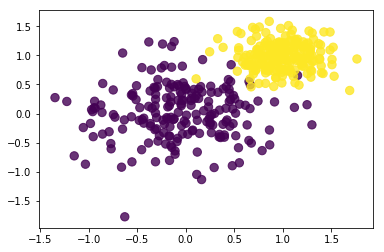

In [3]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

,Category 0,Category 1,Category 2,Category 3
0,"(0.1491652574676265, -0.2758083968275593)","(1.0276303492248504, 0.8131758098069491)","(1.6946432985738924, 0.11367451007588347)","(3.135265462803725, 3.017454675368949)"
1,"(-0.029353601018540357, 0.07903292814073347)","(0.9696853806517156, 1.024123626778946)","(2.1555231799427412, 0.9288239501503622)","(2.729903867277618, 3.081751749457368)"
2,"(0.10133670032599866, -0.0368282063385455)","(0.8872429616486914, 1.4089835641842754)","(2.373817255204636, 1.3199394238868343)","(2.920350120182102, 2.8489805916690543)"
3,"(-0.2410793429721266, -0.2866994922010914)","(0.7024582470326933, 0.9807287534842299)","(2.5094132679714463, 1.3474116969399432)","(2.8272166600565414, 3.040733219339047)"
4,"(0.4367956632737537, -0.3929533671175313)","(1.2264549909830382, 1.1658444291475862)","(2.2379001816660136, 1.4533430200983366)","(3.177627531432788, 2.895558034289277)"
...,...,...,...,...
195,"(0.6179032522552425, 0.08842896978451965)","(0.7534281930068727, 0.6716094363564542)","(1.6819474868639201, 0.6726004223611786)","(2.981091427577048, 3.0549108604432824)"
196,"(0.3449102468585356, -0.23972344115893623)","(1.1006715178093351, 0.9330717905743736)","(2.0533920615240753, 1.477241522729368)","(2.9566323389369895, 3.085721183644487)"
197,"(0.24640332816484523, -0.21702084182036188)","(1.141636687312992, 0.9251311112235814)","(2.450542595821471, 0.9937518338995016)","(3.281880154871151, 3.026505385484022)"
198,"(-0.0011902958333185132, -0.20924883832578017)","(0.7145544487377844, 0.914382819100317)","(2.2405763887421295, 0.6745025120162857)","(2.89017261438118, 3.2369389993961923)"


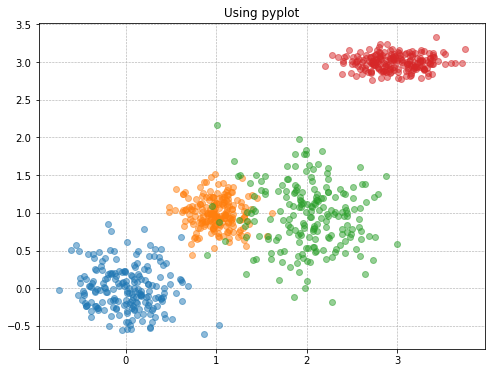

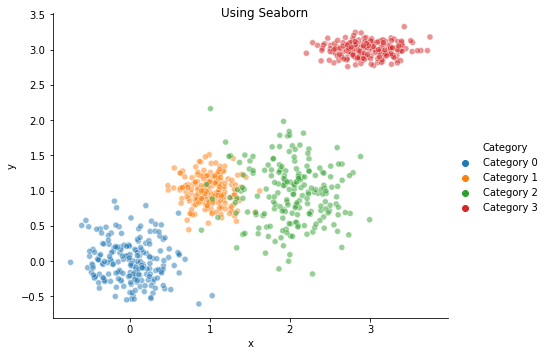

In [4]:
def Dataset_2D(mean, std):
    if len(mean)!=len(std):
        raise Exception("mean and std must have the same length.") # each N() must have its own mean and variance!
        
    df=pd.DataFrame()
    for i in range(len(mean)): # number of values in mean is the number of 2D gaussians to be plotted
        Gauss_2D=np.random.randn(200,2)*std[i]+mean[i] # 2D gaussian with mean and std given...
        Category = pd.DataFrame(Gauss_2D, columns=['x','y']) # ...making a dataframe out of it...
        df = pd.concat([df, Category[['x','y']].apply(tuple,axis=1)], axis=1) # ...and placing side by side with df
        df.rename(columns = {list(df)[i]: 'Category %i' %i}, inplace = True) # renaming "Category i-th" the columns
    return df # returns the dataset with all the categories

#mean and std can be an array of two variables [x,y] but also a number (automatically sets n as [n,n])!
mean = [[0,0], [1,1], [2,1], 3] # mean... 
std = [.3, .2, .4, [.3, .1]] # ...and std can have as many values as you want!
ds = Dataset_2D(mean, std) 

###  PLOTS ###

fig = plt.figure(figsize=(8, 6))
for cat in ds: # a plot for each category
    plt.scatter([x[0] for x in ds[cat]], [y[1] for y in ds[cat]], alpha=0.5, zorder=10); #simply using plt...
plt.title('Using pyplot')
plt.grid(linestyle="--", linewidth=0.6, zorder=-10);

###

to_plot=pd.DataFrame(columns=['x', 'y', 'Category'])
for cat in ds: # a plot for each category
    x = pd.DataFrame([x[0] for x in ds[cat]], columns=['x'])
    y = pd.DataFrame([y[1] for y in ds[cat]], columns=['y'])
    c = pd.DataFrame([cat for i in range(len(x))], columns=['Category'])
    to_plot=pd.concat([to_plot, pd.concat([x,y,c], axis=1)], axis=0) # a vertical DataFrame must be created for seaborn   

g=sns.relplot(x='x', y='y', hue='Category', data=to_plot, height=5, aspect=1.3, alpha=0.5); # ...or using seaborn
g.fig.suptitle('Using Seaborn');

ds

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distances"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distances"
* Plot the profile plot on top of the scatter plot

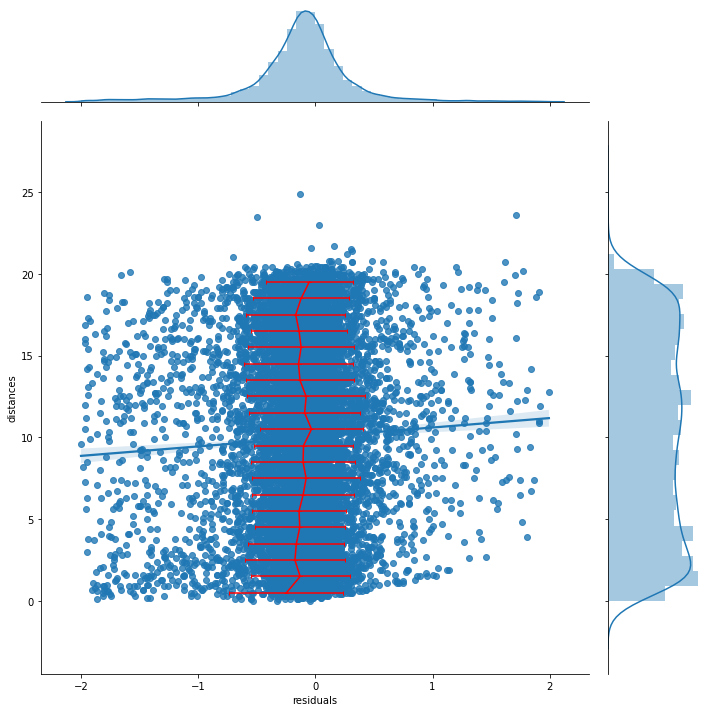

In [5]:
#! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

data = pd.DataFrame(np.load("residuals_261.npy",allow_pickle=True).item()) # load the data
data = data[np.abs(data['residuals'])<2] # filter out data |residuals|>2
res_vs_dist=sp.stats.linregress(data['residuals'],data['distances']) # linear regression with scipy
sns.jointplot("residuals", "distances", data=data, kind='reg', height=10)

N_bins=20
_,bins = np.histogram(data['distances'], N_bins, range=[0,20])
x = (bins[:-1] + bins[1:]) / 2

y=[]; width=x[0]; erry=[];
for center in x:
    slice_i = data[data['distances']<center+width]
    slice_i = slice_i[slice_i['distances']>center-width]
    y.append(np.mean(slice_i['residuals']))
    erry.append(np.std(slice_i['residuals']))
    
plt.errorbar(y,x,0,erry, fmt='r', capsize=2);